# Петров Сергей

# Предподготовка

## Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

import numpy.ma as ma
from itertools import combinations
from random import shuffle
r_state = 42

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [47]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [48]:
def show_metrics(y_true, y_pred):
    
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    
    for msg, metric in zip(
        ['accuracy', 'precision', 'recall', 'f1', 'roc auc'],
        [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]):
        print(f"{msg:10}", round(metric(y_true, y_pred)*100, 1))

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Численные колонки

In [5]:
num_cols = list(df.select_dtypes(include=np.number).columns)
df[num_cols].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Категорилаьные колонки

In [6]:
cat_cols = list(df.drop(num_cols + ['income'], axis=1).columns)
cat_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [7]:
for cat in cat_cols:
    print(cat, len(df[cat].unique()))

workclass 9
education 16
marital.status 7
occupation 15
relationship 6
race 5
sex 2
native.country 42


## One Hot Endcoding

In [8]:
to_ohe =['education','native.country','occupation']

In [9]:
enc = OneHotEncoder()

In [10]:
encoded = enc.fit_transform(df[to_ohe]).toarray()


In [11]:
encoded.shape

(32561, 73)

In [12]:
df.shape

(32561, 15)

In [13]:
encoded_names = list(enc.get_feature_names_out(to_ohe))
encoded_names

['education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'native.country_?',
 'native.country_Cambodia',
 'native.country_Canada',
 'native.country_China',
 'native.country_Columbia',
 'native.country_Cuba',
 'native.country_Dominican-Republic',
 'native.country_Ecuador',
 'native.country_El-Salvador',
 'native.country_England',
 'native.country_France',
 'native.country_Germany',
 'native.country_Greece',
 'native.country_Guatemala',
 'native.country_Haiti',
 'native.country_Holand-Netherlands',
 'native.country_Honduras',
 'native.country_Hong',
 'native.country_Hungary',
 'native.country_India',
 'native.country_Iran',
 'native.country_Ireland',
 'native.country_Italy',
 'native.countr

In [14]:
for i in range(len(encoded_names)):
    df[encoded_names[i]] = encoded[:,i]

In [15]:
cat_cols = [col for col in cat_cols if col not in to_ohe]

In [16]:
cat_cols += encoded_names

In [17]:
cat_cols

['workclass',
 'marital.status',
 'relationship',
 'race',
 'sex',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'native.country_?',
 'native.country_Cambodia',
 'native.country_Canada',
 'native.country_China',
 'native.country_Columbia',
 'native.country_Cuba',
 'native.country_Dominican-Republic',
 'native.country_Ecuador',
 'native.country_El-Salvador',
 'native.country_England',
 'native.country_France',
 'native.country_Germany',
 'native.country_Greece',
 'native.country_Guatemala',
 'native.country_Haiti',
 'native.country_Holand-Netherlands',
 'native.country_Honduras',
 'native.country_Hong',
 'native.country_Hungary',
 'native.country_India',
 'native.country_Iran',


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        32561 non-null  int64  
 1   workclass                                  32561 non-null  object 
 2   fnlwgt                                     32561 non-null  int64  
 3   education                                  32561 non-null  object 
 4   education.num                              32561 non-null  int64  
 5   marital.status                             32561 non-null  object 
 6   occupation                                 32561 non-null  object 
 7   relationship                               32561 non-null  object 
 8   race                                       32561 non-null  object 
 9   sex                                        32561 non-null  object 
 10  capital.gain          

## Финальная обработка

In [19]:
df['income'] = (df['income'] == '>50K').astype(int)

In [20]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [21]:
train_df, test_df = train_test_split(df,  test_size=0.25, random_state=r_state)

In [22]:
X_train = train_df[num_cols + cat_cols]
X_test = test_df[num_cols + cat_cols]

y_train = train_df['income'].to_numpy(dtype = int)
y_test = test_df['income'].to_numpy(dtype = int)

In [23]:
np.unique(y_test)

array([0, 1])

# №1 Лучшие категориальные фичи

In [24]:
def entropy(p):
    try:
        return -p * np.log2(p) - (1-p) * np.log2(1-p)
    except:
        return 1

In [25]:
def gini_impurity(p):
    return 1 - (p**2 + (1-p)**2)

In [26]:
def gini_impurity_linear(p):
    return 1 - (p + (1-p))

In [27]:
def best_continious_split(values, targets, criterion):
    sorted_pairs = sorted(list(zip(values, targets)), key = lambda x: x[0])
    
    n = len(sorted_pairs)
    p = sum(targets) / n
    node_criterion = criterion(p)
    
    best_criterion = node_criterion
    best_split = None
    
    ones = 0
    total_ones = sum(targets)
    
    for i in range(1, len(sorted_pairs)):
        ones += sorted_pairs[i-1][1]
        
        if(sorted_pairs[i-1][0] == sorted_pairs[i][0]):
            continue
        split_val = (sorted_pairs[i-1][0] + sorted_pairs[i][0]) / 2
        
        p_left = ones / i
        p_right = (total_ones - ones) / (n-i)
        
        split_criterion = i / n * criterion(p_left) + (n-i) / n * criterion(p_right)
        
        if split_criterion < best_criterion:
            best_criterion = split_criterion
            best_split = split_val

    
    return (best_split, best_criterion)

In [28]:
best_continious_split(X_train['age'], y_train, gini_impurity)

(30.5, 0.3360510089306659)

In [29]:
def best_categorical_split(values, targets, criterion):
    all_comb = []
    uniq = list(np.unique(values))
    
    for i in range(1, int(np.ceil(len(uniq)/2)) + 1):
        all_comb += list(combinations(uniq, i))
        
    n = len(values)
    p = sum(targets) / n
    node_criterion = criterion(p)
    
    best_criterion = node_criterion
    best_split = ""
    
    total_ones = sum(targets)
    
    for i in all_comb:
        chosen = targets[values.apply(lambda x: x in i)]
        
        ones = np.sum(chosen)
        p_left = ones / chosen.shape[0]
        p_right = (total_ones - ones) / (n - chosen.shape[0])
        
        split_criterion = chosen.shape[0]/n * criterion(p_left) + (n - chosen.shape[0]) / n * criterion(p_right)
        if split_criterion < best_criterion:
            best_criterion = split_criterion
            best_split = i

    
    return (list(best_split), best_criterion)

In [30]:
best_categorical_split(X_train['race'], y_train, entropy)

(['Asian-Pac-Islander', 'White'], 0.788699528513619)

In [31]:
best_categorical_split(X_train['sex'], y_train, gini_impurity)

(['Female'], 0.3492195955392974)

In [32]:
best_categorical_split(X_train['workclass'], y_train, gini_impurity)

(['Federal-gov', 'Self-emp-inc'], 0.3585372920471675)

In [33]:
def random_categorical_split(values, targets, criterion, samples = None):
    all_comb = []
    uniq = list(np.unique(values))
    
    for i in range(1, int(np.ceil(len(uniq)/2)) + 1):
        all_comb += list(combinations(uniq, i))
        
    if(samples is None):
        if(len(uniq) > 3):
            samples = int(len(all_comb)/2)
        else:
            samples = len(all_comb)
    shuffle(all_comb)
    all_comb = all_comb[:samples]
    n = len(values)
    p = sum(targets) / n
    node_criterion = criterion(p)
    
    best_criterion = node_criterion
    best_split = ""
    
    total_ones = sum(targets)
    
    for i in all_comb:
        chosen = targets[values.apply(lambda x: x in i)]
        
        ones = np.sum(chosen)
        p_left = ones / chosen.shape[0]
        p_right = (total_ones - ones) / (n - chosen.shape[0])
        
        split_criterion = chosen.shape[0]/n * criterion(p_left) + (n - chosen.shape[0]) / n * criterion(p_right)
        if split_criterion < best_criterion:
            best_criterion = split_criterion
            best_split = i

    
    return (list(best_split), best_criterion)

In [34]:
random_categorical_split(X_train['race'], y_train, entropy)

(['Amer-Indian-Eskimo', 'Black', 'Other'], 0.788699528513619)

In [35]:
random_categorical_split(X_train['sex'], y_train, gini_impurity)

(['Male'], 0.3492195955392974)

In [36]:
random_categorical_split(X_train['workclass'], y_train, gini_impurity)

(['Federal-gov', 'Self-emp-inc'], 0.3585372920471675)

# №2 (рекурентное)Дерево решение с ограничением глубины

In [37]:
class NodeOfDT_deep():
    def __init__(self, X, y, cat_cols, criterion, max_depth = 10, min_in_leaf = 1000,depth = 0):

        self.is_leaf = False
        #Если лист
        if(X.shape[0] <= min_in_leaf or depth >= max_depth):
            self.is_leaf = True
            self.p = np.sum(y)/y.shape[0]
            print(depth, self.p, y.shape[0])
            return
        #Если не лист
        num_cols = [col for col in list(X.columns) if col not in cat_cols]
        num_bests = [[col, best_continious_split(X[col], y,criterion)] for col in num_cols]
        num_bests = [best for best in num_bests if not(best[1][0] is None)]
        cat_bests = [[col, best_categorical_split(X[col], y,criterion)] for col in cat_cols]
        cat_bests = [best for best in num_bests if not(best[1][0] == [])]
        
        num_cols = list(set([x[0] for x in num_bests]) & set(num_cols))
        bests = num_bests + cat_bests
        
        #Разбиений не осталось
        if(len(bests) <= 0):
            self.is_leaf = True
            self.p = np.sum(y)/y.shape[0]
            print(depth, self.p, y.shape[0])
            return
        
        best_col, best_split = min(num_bests + cat_bests, key=lambda i: i[1][1])
        
        self.col = best_col
        self.cond = best_split[0]
        if(best_col in cat_cols):
            self.is_cat = True
            if(len(X[best_col].unique()) - len(best_split[0]) <= 1):
                cat_cols.remove(best_col)
            mask = X[best_col].apply(lambda x: x in best_split[0])
        else:
            self.is_cat = False
            mask =  X[best_col] < best_split[0]
            
        col_mask = num_cols + cat_cols
        self.into_cond = NodeOfDT_deep(X[col_mask][mask], y[mask], cat_cols[:], criterion,max_depth, min_in_leaf, depth + 1)
        self.outo_cond = NodeOfDT_deep(X[col_mask][~mask], y[~mask], cat_cols[:], criterion,max_depth, min_in_leaf, depth + 1)
        
    def predict(self, X):
        if(self.is_leaf):
            return self.p
        
        if(self.is_cat):
            if(X[self.col] in self.cond):
                return self.into_cond.predict(X)
            else:
                return self.outo_cond.predict(X)
        else:
            if(X[self.col] < self.cond):
                return self.into_cond.predict(X)
            else:
                return self.outo_cond.predict(X)
            

In [38]:
# Используя функции нахождения сплита, реализуйте свой класс MyDecisionTreeClassifier
# Для бинарной классификации, который может использовать в качестве критерия 
# gini impurity и entropy на выбор
         

class MyDecisionTreeClassifier:
    def __init__(self, criterion=gini_impurity, max_depth=6, min_samples_leaf=1500):
        '''
        Конструктор класса
        criterion -- критерий может быть либо 'gini', либо 'entropy'
        max_leaves -- максимальное количество листо в дереве, если None -- то дерево не ограничено
        min_samples_leaf -- минимальное количество объектов в листе
        '''
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
    
    def fit(self, X_train, y_train, cat_cols):
        '''
        Функция обучения -- рекурсивно проводит разбиения и выбирает наилучшее
        '''
        self.bt = NodeOfDT_deep(X_train, y_train, cat_cols, self.criterion, max_depth = self.max_depth, min_in_leaf = self.min_samples_leaf)
    
    def predict(self, X):
        '''
        Функция предсказания класса, для каждого наблюдения проходит по дереву, пока не попадёт в лист
        В зависимости от листа, в который попало наблюдение делается предсказание (наиболее часто встречающийся класс)
        '''
        return X.apply(lambda x: 1 if self.bt.predict(x) >= 0.5 else 0, axis = 1)
    
    def predict_proba(self, X):
        '''
        Функция предсказания вероятности класса, для каждого наблюдения проходит по дереву, пока не попадёт в лист
        В зависимости от листа, в который попало наблюдение делается предсказание для каждого класса:
        Его доля в листе
        '''
        NX = X.copy()
        NX['one'] = X.apply(lambda x: self.bt.predict(x), axis = 1)
        NX['zero'] = NX['one'].apply(lambda x: 1 - x, axis = 1)
        return NX[['one','zero']]

In [39]:
dt = MyDecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train, cat_cols)

C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


6 0.00299311583358276 3341
6 0.03337041156840934 899
5 1.0 1


C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


6 0.07442813246841926 2929
6 0.15419161676646706 668
5 0.40298507462686567 67


C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


6 0.05450416351249054 1321
6 0.17812388113139993 5586


C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


6 0.11974110032362459 309
6 0.3210286188303608 2411
4 0.6524590163934426 305


C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


3 0.09699321047526673 1031


C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])
C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


6 0.2996941896024465 654
6 0.4385423100679432 1619
6 0.3938223938223938 259
6 0.5948103792415169 1503
4 0.9240506329113924 316
1 0.9467110741049126 1201


C:\Users\sereg\AppData\Local\Temp\ipykernel_604\1389556583.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p_right = (total_ones - ones) / (n - chosen.shape[0])


In [41]:
accuracy_score(y_test, dt.predict(X_test))

0.8295049748188184

accuracy   83.0
precision  76.0
recall     41.8
f1         53.9
roc auc    68.8


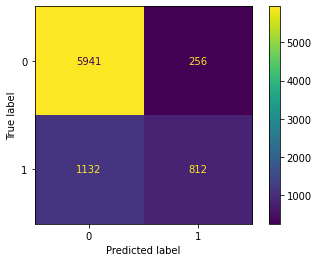

In [49]:
show_metrics(y_test, dt.predict(X_test))

# №3 Дерево решений с ограничением на число листов

In [42]:
# Используя функции нахождения сплита, реализуйте свой класс MyDecisionTreeClassifier
# Для бинарной классификации, который может использовать в качестве критерия 
# gini impurity и entropy на выбор

class NodeOfDT_max_leafs():
    def __init__(self, col_cat_mask, col_num_mask, row_mask):
        self.into = None
        self.outo = None
        self.is_leaf = False
        self.is_cat = None
        self.col_cat_mask = col_cat_mask
        self.col_num_mask = col_num_mask
        self.row_mask = row_mask
        self.best_split = None
        self.p = None
        
    def split(self, X):
        best_col = self.best_split[0]
        best_split = self.best_split[1][0]
        
        
        if(best_col in self.col_cat_mask):
            self.is_cat = True
            mask = X[best_col].apply(lambda x: x in best_split) & self.row_mask
            if(len(X[self.row_mask][best_col].unique()) - len(best_split) <= 1):
                self.col_cat_mask.remove(best_col)
        else:
            self.is_cat = False
            mask =  (X[best_col] < best_split) & self.row_mask
            
            
        self.into = NodeOfDT_max_leafs(self.col_cat_mask, self.col_num_mask, mask)
        self.outo = NodeOfDT_max_leafs(self.col_cat_mask, self.col_num_mask, ~mask & self.row_mask)
        
    def predict(self, X):
        if(self.is_leaf):
            return self.p
        
        if(self.is_cat):
            if(X[self.best_split[0]] in self.best_split[1][0]):
                return self.into.predict(X)
            else:
                return self.outo.predict(X)
        else:
            if(X[self.best_split[0]] < self.best_split[1][0]):
                return self.into.predict(X)
            else:
                return self.outo.predict(X)
    
def find_best_split(X_train, y_train, bt, criterion):
    num_bests = [[col, best_continious_split(X_train[bt.row_mask][col], y_train[bt.row_mask],criterion)] for col in bt.col_num_mask]
    num_bests = [best for best in num_bests if not(best[1][0] is None)]
    
    cat_bests = [[col, best_categorical_split(X_train[bt.row_mask][col], y_train[bt.row_mask],criterion)] for col in bt.col_cat_mask]
    cat_bests = [best for best in num_bests if not(best[1][0] == [])]
    
    bt.col_num_mask = list(set([x[0] for x in num_bests]) & set(bt.col_num_mask))
    bt.col_cat_mask = list(set([x[0] for x in cat_bests]) & set(bt.col_cat_mask))
    if(len(cat_bests + num_bests) <= 0):
        return None
    return min(num_bests + cat_bests, key=lambda i: i[1][1])
    
class MyDecisionTreeClassifier:
    def __init__(self, criterion=gini_impurity, max_leafs=50, min_samples_leaf=1500):
        '''
        Конструктор класса
        criterion -- критерий может быть либо 'gini', либо 'entropy'
        max_leaves -- максимальное количество листо в дереве, если None -- то дерево не ограничено
        min_samples_leaf -- минимальное количество объектов в листе
        '''
        self.criterion = criterion
        self.max_leafs = max_leafs
        self.min_samples_leaf = min_samples_leaf
        self.bt = None
    
    def fit(self, X_train, y_train, cat_cols):
        
        num_cols = [col for col in list(X_train.columns) if col not in cat_cols]
        self.bt = NodeOfDT_max_leafs(cat_cols, num_cols, X_train.apply(lambda x: not(x is None), axis = 1))
        self.bt.best_split = find_best_split(X_train, y_train, self.bt, self.criterion)
        
        
        leafs = [self.bt]
        dead_leafs = []
        counter = 0
        while(len(leafs) > 0 and len(leafs) + len(dead_leafs) < self.max_leafs):
            leaf_to_split = min(leafs, key = lambda x: x.best_split[1][1])
            # print('lvl', counter, 'best split of lvl',leaf_to_split.best_split)
            # print('lvl', counter, 'Size of dt in node', X_train[leaf_to_split.row_mask].shape[0])
            leaf_to_split.split(X_train)
            leafs.remove(leaf_to_split)
            into = leaf_to_split.into
            # print('lvl', counter, 'Size of into in node', X_train[into.row_mask].shape[0])
            if(X_train[into.row_mask].shape[0] < self.min_samples_leaf):
                dead_leafs += [into]
            else:
                into.best_split = find_best_split(X_train, y_train, into, self.criterion)
                if(into.best_split is None):
                    dead_leafs += [into]
                else:
                    leafs += [into]
            outo = leaf_to_split.outo
            # print('lvl', counter, 'Size of outo in node', X_train[outo.row_mask].shape[0])
            if(X_train[outo.row_mask].shape[0] < self.min_samples_leaf):
                dead_leafs += [outo]
            else:
                outo.best_split = find_best_split(X_train, y_train, outo, self.criterion)
                if(outo.best_split is None):
                    dead_leafs += [outo]
                else:
                    leafs += [outo]
                
            # print('lvl', counter, 'leafs', leafs)
            # print('lvl', counter, 'dead_leafs', dead_leafs)
            counter += 1
                
        dead_leafs += leafs
        
        print('LEAFS _______________________________________________________________')
        
        # sum_ = 0
        print('leafs count', len(dead_leafs))
        for l in dead_leafs:
            l.is_leaf = True
            l.p = sum(y_train[l.row_mask])/y_train[l.row_mask].shape[0]
            # sum_ += y_train[l.row_mask].shape[0]
            print(l.p, y_train[l.row_mask].shape[0])
        # print(sum_)
            
            
        
    
    def predict(self, X):
        '''
        Функция предсказания класса, для каждого наблюдения проходит по дереву, пока не попадёт в лист
        В зависимости от листа, в который попало наблюдение делается предсказание (наиболее часто встречающийся класс)
        '''
        return X.apply(lambda x: 1 if self.bt.predict(x) >= 0.5 else 0, axis = 1)
    
    def predict_proba(self, X):
        '''
        Функция предсказания вероятности класса, для каждого наблюдения проходит по дереву, пока не попадёт в лист
        В зависимости от листа, в который попало наблюдение делается предсказание для каждого класса:
        Его доля в листе
        '''
        NX = X.copy()
        NX['one'] = X.apply(lambda x: self.bt.predict(x), axis = 1)
        NX['zero'] = NX['one'].apply(lambda x: 1 - x, axis = 1)
        return NX[['one','zero']]

In [51]:
bt = MyDecisionTreeClassifier(max_leafs = 60)

In [52]:
bt.fit(X_train, y_train, cat_cols)

LEAFS _______________________________________________________________
leafs count 33
0.9467110741049126 1201
1.0 1
0.03337041156840934 899
0.025974025974025976 231
0.03125 32
0.0 2191
0.0033821871476888386 887
0.40298507462686567 67
0.15419161676646706 668
0.10290237467018469 1137
0.6666666666666666 3
1.0 1
0.019559902200488997 409
0.06526468455402465 1379
0.6524590163934426 305
0.05450416351249054 1321
0.07080504364694472 1031
0.13714285714285715 525
0.15285171102661596 1315
0.21572212065813529 1094
0.2730799069045772 1289
0.18373493975903615 332
0.11974110032362459 309
0.28028503562945367 1263
0.36585365853658536 1148
0.09699321047526673 1031
0.9240506329113924 316
0.2996941896024465 654
0.3117505995203837 417
0.4825291181364393 1202
0.3938223938223938 259
0.5626477541371159 1269
0.7692307692307693 234


In [53]:
bt.predict(X_train)

29       1
12181    0
18114    0
4278     1
12050    0
        ..
29802    0
5390     0
860      1
15795    0
23654    0
Length: 24420, dtype: int64

In [54]:
accuracy_score(y_test, bt.predict(X_test))

0.8291364697211645

accuracy   82.9
precision  75.8
recall     41.8
f1         53.9
roc auc    68.8


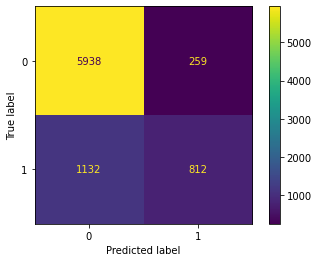

In [55]:
show_metrics(y_test, bt.predict(X_test))